<a href="https://colab.research.google.com/github/Sanjana-Moturi/ASD_ML/blob/main/ASD_female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [ ]:
# read the csv data to a pandas dataframe
df = pd.read_csv("/content/train.csv")

In [ ]:
df.shape

(800, 22)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [ ]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [ ]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
# dropping ID & age_desc column
df = df.drop(columns=["ID", "age_desc"])

In [ ]:
df.shape

(800, 20)

In [ ]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
# target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
df["gender"].value_counts()

,count
gender,
m,530
f,270


In [ ]:
df["gender"] = df["gender"].map({"m": 1, "f": 0})

In [ ]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,1,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,1,White-European,no,yes,United States,no,14.851484,Self,1


In [ ]:
df.shape

(800, 20)

In [ ]:
#only female data,no male
df = df[df["gender"] != 1]

In [ ]:
df.shape

(270, 20)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,?,no,no,Austria,no,6.351166,Self,0
3,0,0,0,0,0,0,0,0,0,0,23,0,?,no,no,United States,no,2.276617,Self,0
6,1,0,0,0,0,0,1,1,1,0,28,0,Pasifika,no,no,United Kingdom,no,7.984569,Self,0
9,0,0,0,0,0,0,0,1,0,1,24,0,Others,yes,no,New Zealand,no,14.922570,Self,0
10,1,1,1,1,1,1,1,0,1,1,21,0,?,no,no,Canada,no,13.839255,Self,0


In [ ]:
for col in df.columns:
  numerical_features = ["gender", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
ethnicity ['?' 'Pasifika' 'Others' 'Asian' 'White-European' 'Middle Eastern '
 'Black' 'South Asian' 'Turkish' 'Latino' 'others' 'Hispanic']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim ['no' 'yes']
--------------------------------------------------
con

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,215
1,55


In [ ]:
df = df.drop(columns=["gender"])

In [ ]:
df.shape

(270, 19)

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.625926,0.562963,0.492593,0.418519,0.425926,0.322222,0.440741,0.533333,0.525926,0.670370,28.896296,8.508617,0.203704
std,0.484781,0.496941,0.500874,0.494232,0.495401,0.468195,0.497398,0.499814,0.500255,0.470952,16.550149,4.975614,0.403499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.191252,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,9.463980,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,12.618522,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,15.853126,1.000000


In [ ]:
df.groupby("Class/ASD").mean(numeric_only=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
Class/ASD,,,,,,,,,,,,
0,0.562791,0.479070,0.395349,0.297674,0.334884,0.213953,0.339535,0.460465,0.418605,0.590698,27.302326,7.627678
1,0.872727,0.890909,0.872727,0.890909,0.781818,0.745455,0.836364,0.818182,0.945455,0.981818,35.127273,11.952290


**Univariate** **Analysis**

Numerical Columns:

- age
- result

In [ ]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean: 28.896296296296295
Median: 25.0


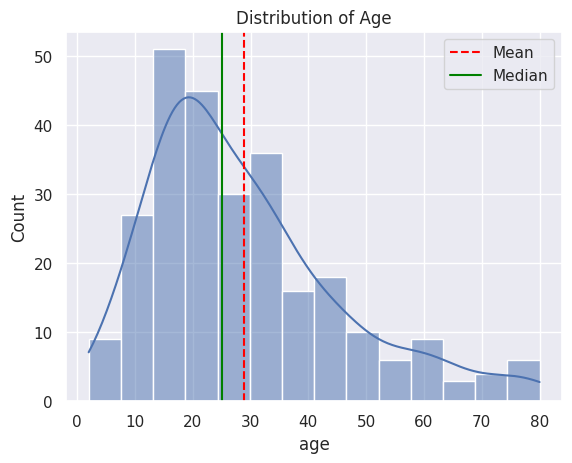

In [ ]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.508617468714814
Median: 9.463979956


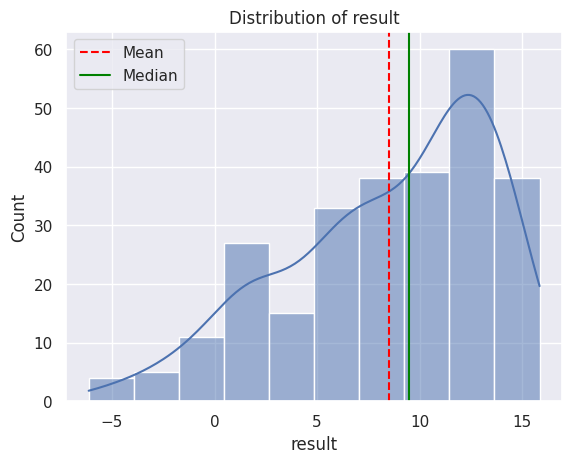

In [ ]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

**Box plots for identifying outliers in the numerical columns**

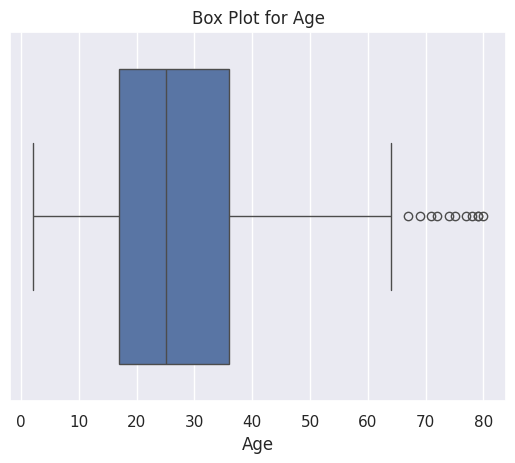

In [ ]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

In [ ]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [ ]:
len(age_outliers)

11

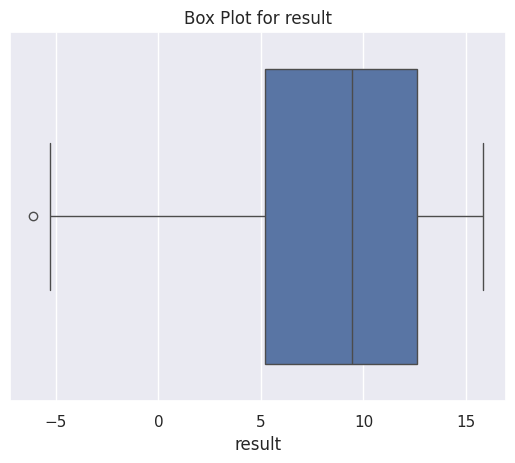

In [ ]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [ ]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [ ]:
len(result_outliers)

1

In [ ]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,Asian,no,no,Jordan,no,-6.137748,Self,0


**Univariate analysis of Categorical columns**

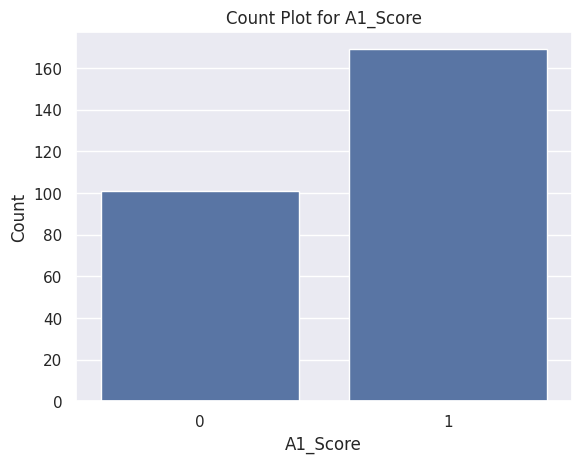

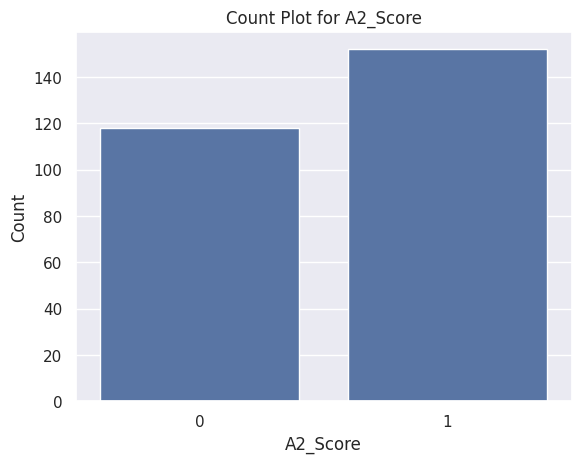

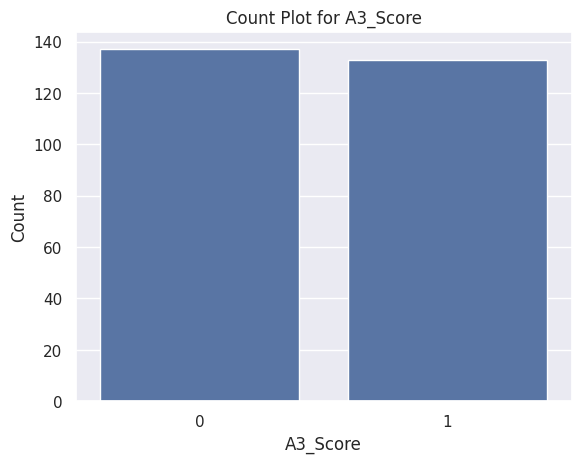

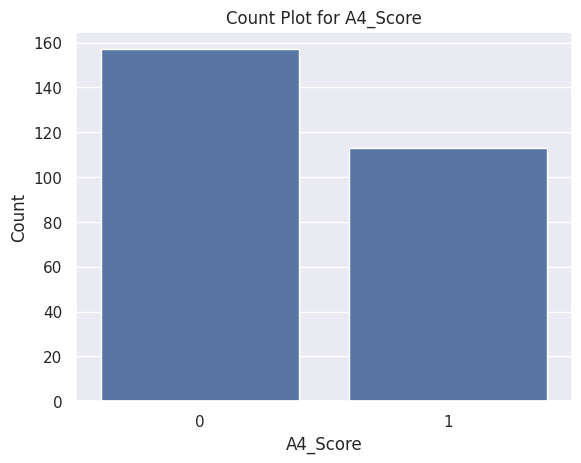

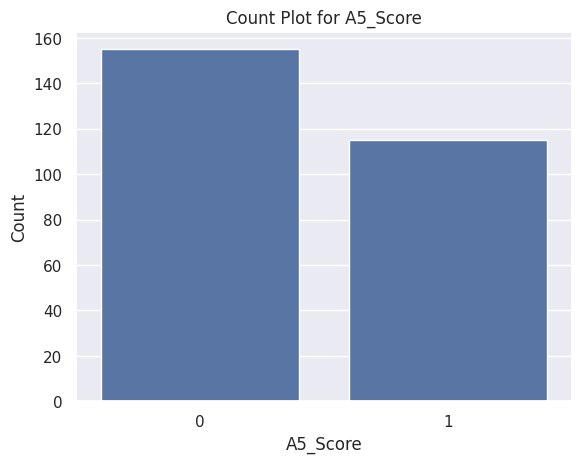

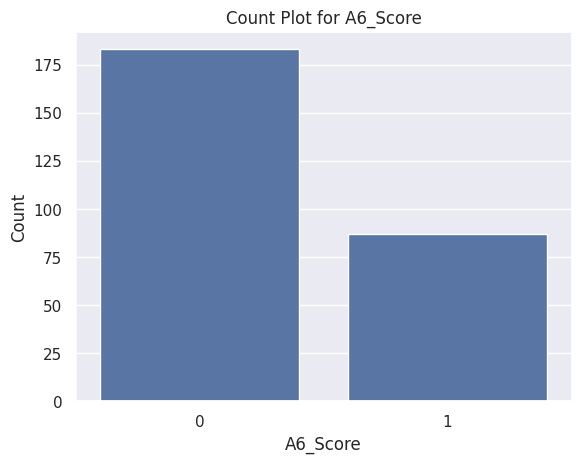

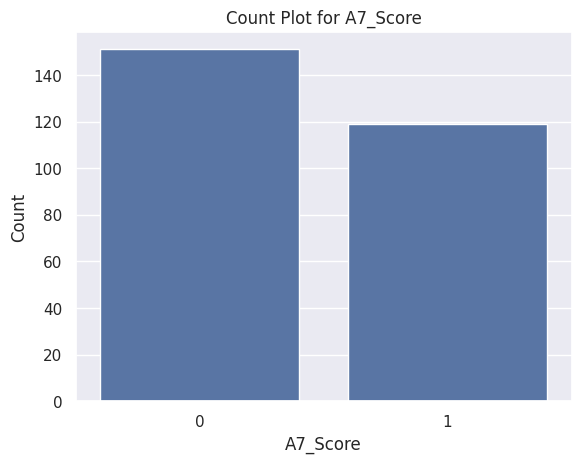

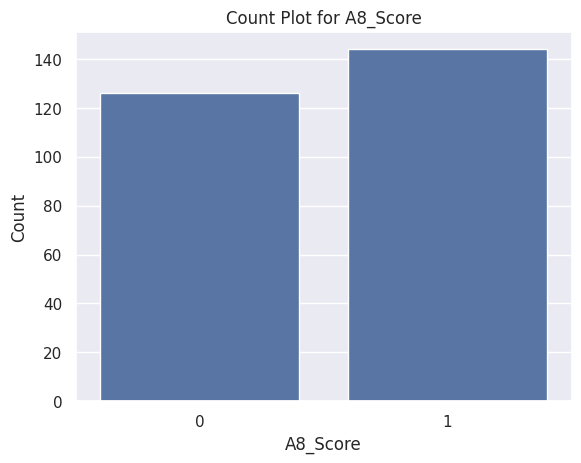

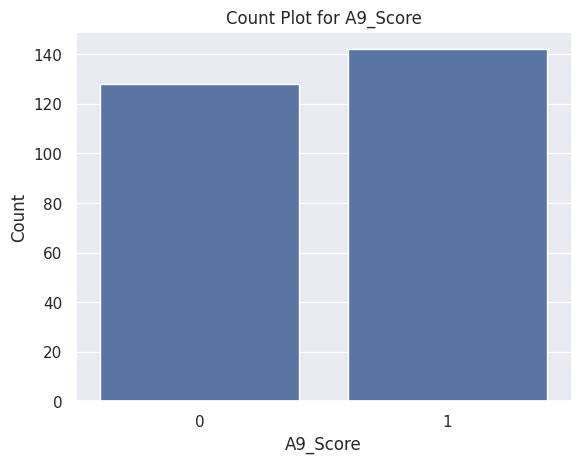

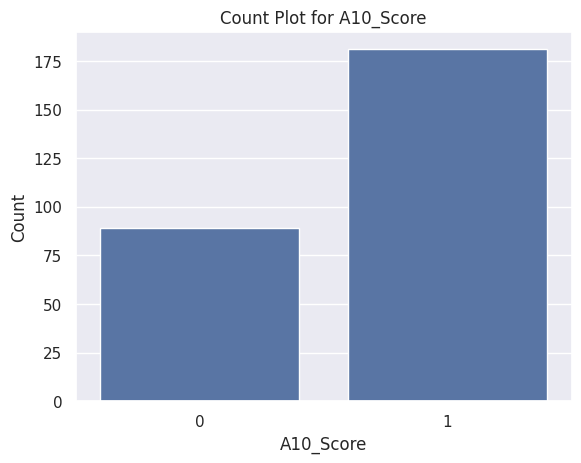

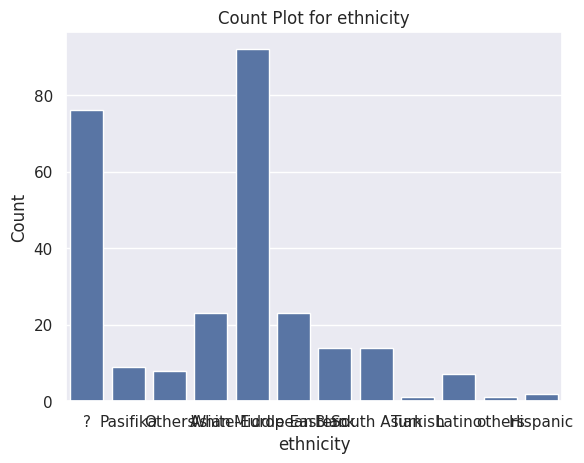

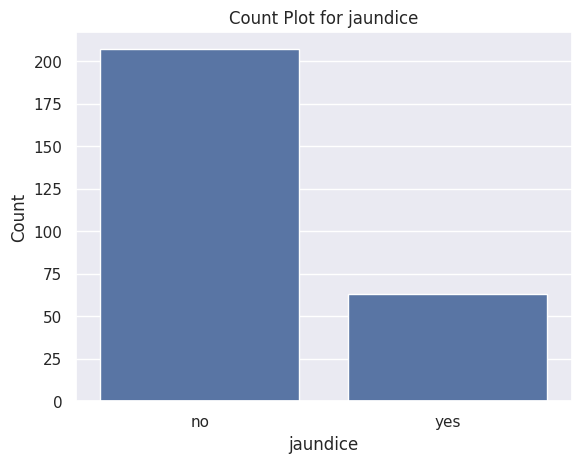

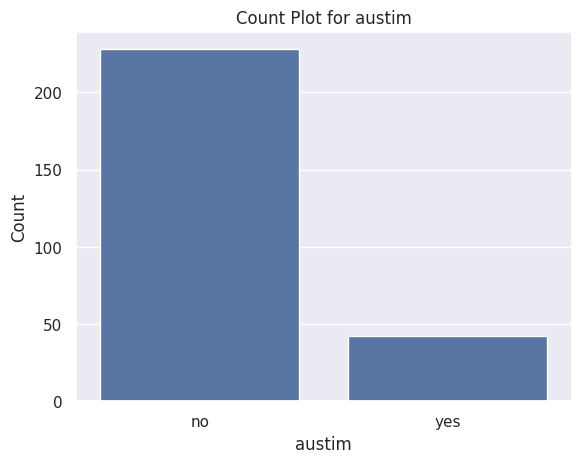

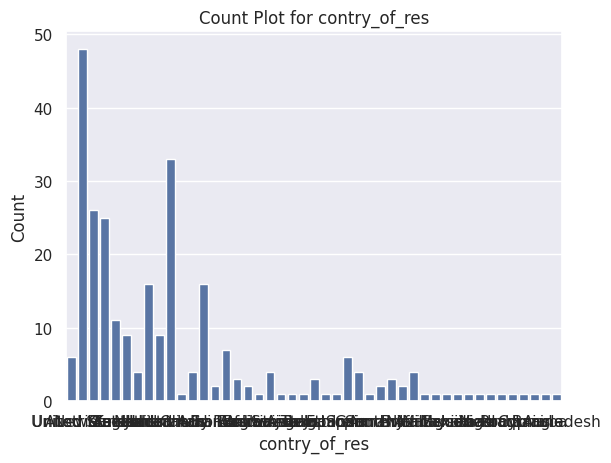

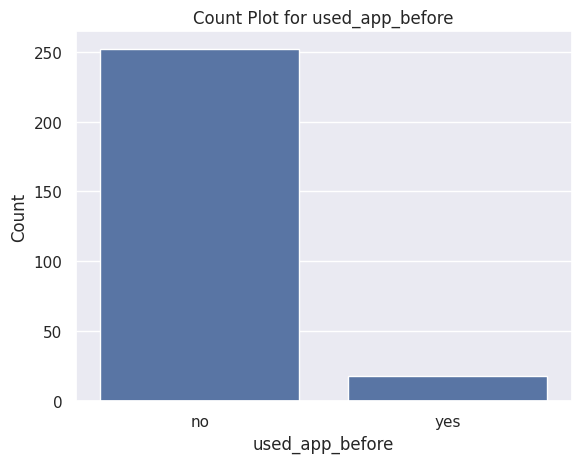

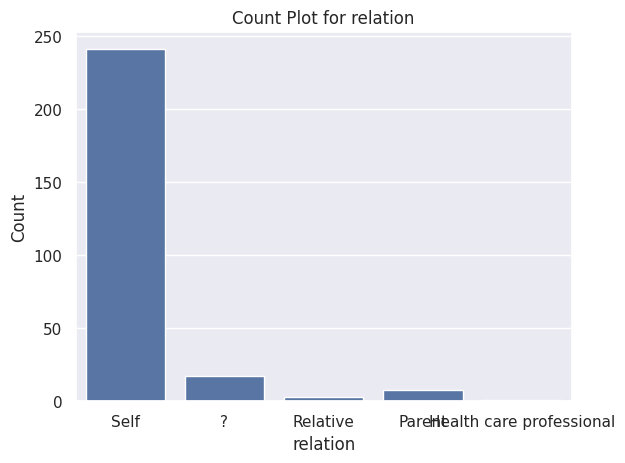

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

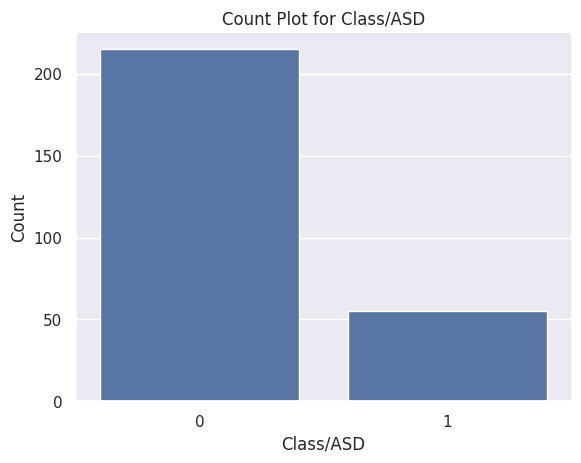

In [ ]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,215
1,55


handle missing values in ethnicity and relation column

In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [ ]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,Others,no,no,Austria,no,6.351166,Self,0
3,0,0,0,0,0,0,0,0,0,0,23,Others,no,no,United States,no,2.276617,Self,0
6,1,0,0,0,0,0,1,1,1,0,28,Pasifika,no,no,United Kingdom,no,7.984569,Self,0
9,0,0,0,0,0,0,0,1,0,1,24,Others,yes,no,New Zealand,no,14.922570,Self,0
10,1,1,1,1,1,1,1,0,1,1,21,Others,no,no,Canada,no,13.839255,Self,0


**Label Encoding**

In [ ]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [ ]:
print(object_columns)

Index(['ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation'],
      dtype='object')


In [ ]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,5,0,0,5,0,6.351166,1,0
3,0,0,0,0,0,0,0,0,0,0,23,5,0,0,43,0,2.276617,1,0
6,1,0,0,0,0,0,1,1,1,0,28,6,0,0,42,0,7.984569,1,0
9,0,0,0,0,0,0,0,1,0,1,24,5,1,0,28,0,14.922570,1,0
10,1,1,1,1,1,1,1,0,1,1,21,5,0,0,11,0,13.839255,1,0


**Bivariate Analysis**

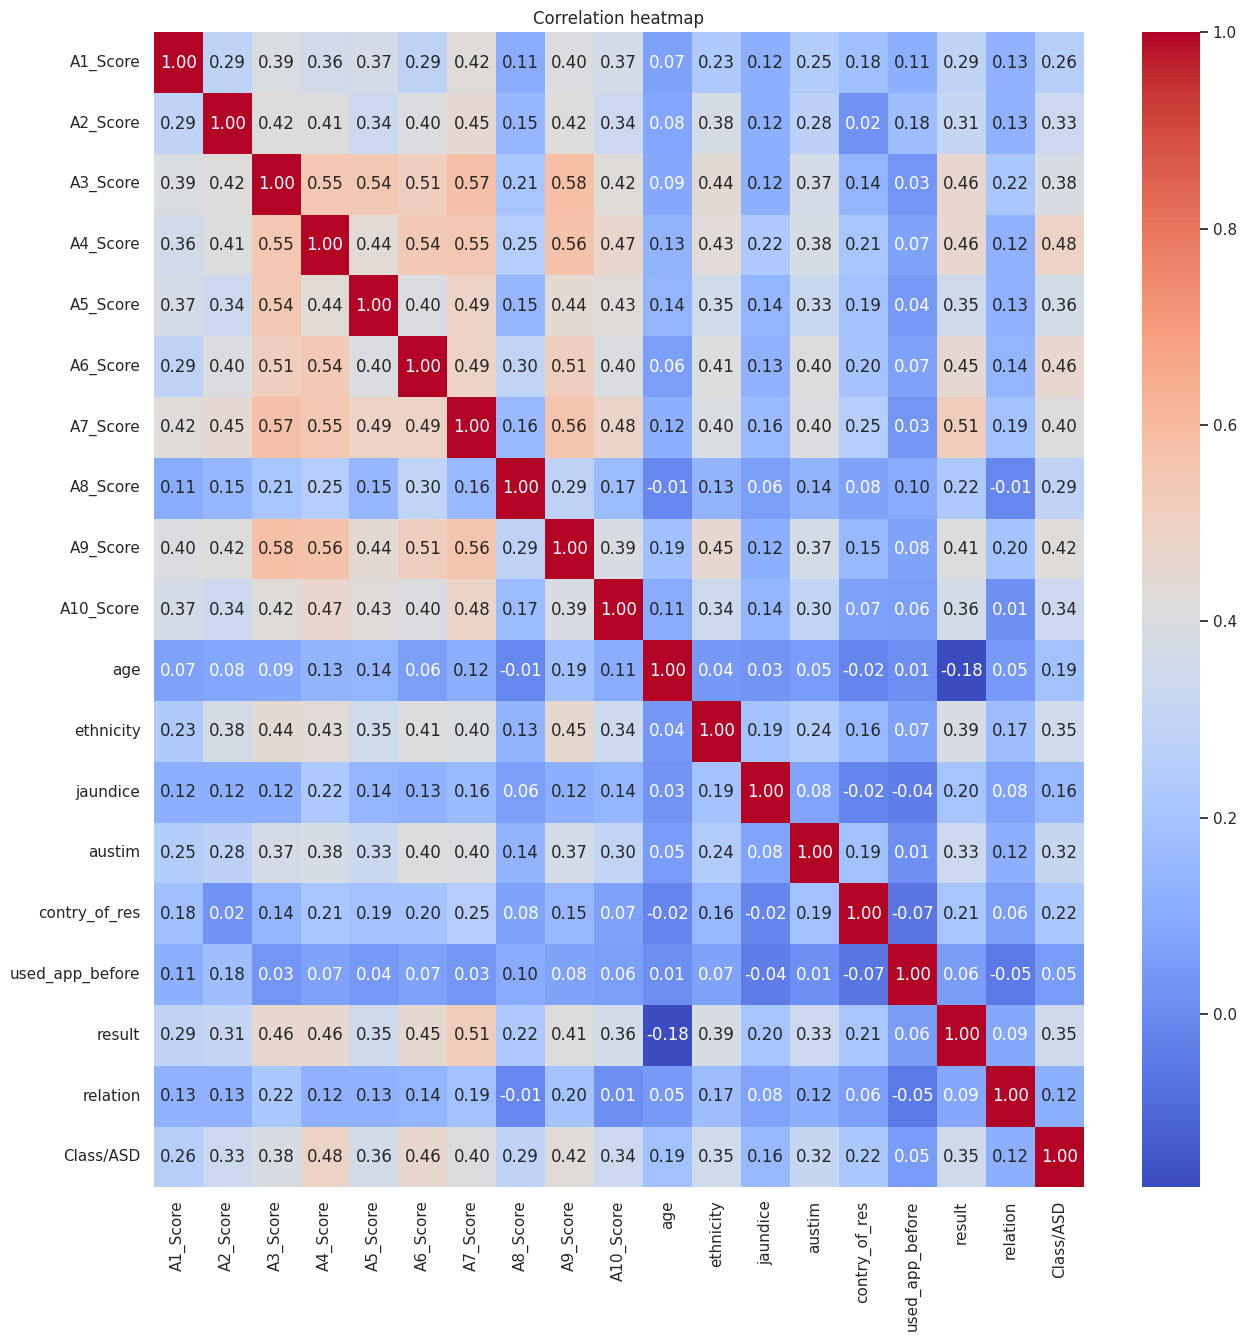

In [ ]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

**4. Data preprocessing**

In [ ]:
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,5,0,0,5,0,6.351166,1,0
3,0,0,0,0,0,0,0,0,0,0,23.0,5,0,0,43,0,2.276617,1,0
6,1,0,0,0,0,0,1,1,1,0,28.0,6,0,0,42,0,7.984569,1,0
9,0,0,0,0,0,0,0,1,0,1,24.0,5,1,0,28,0,14.922570,1,0
10,1,1,1,1,1,1,1,0,1,1,21.0,5,0,0,11,0,13.839255,1,0


In [ ]:
df.shape

(270, 19)

**Train Test Split**

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'ethnicity',
       'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
3           0         0         0         0         0         0         0   
6           1         0         0         0         0         0         1   
9           0         0         0         0         0         0         0   
10          1         1         1         1         1         1         1   
..        ...       ...       ...       ...       ...       ...       ...   
783         1         1         1         1         1         1         1   
786         1         1         1         1         1         0         1   
788         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  ethnicity  jaundice  austim  \
0 

In [ ]:
print(y)

0      0
3      0
6      0
9      0
10     0
      ..
783    0
786    0
788    0
798    0
799    0
Name: Class/ASD, Length: 270, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(216,)
(54,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,171
1,45


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,44
1,10


**SMOTE (Synthetic Minority Oversampling technique)**

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.shape)

(342,)


In [ ]:
print(y_train_smote.value_counts())

Class/ASD
0    171
1    171
Name: count, dtype: int64


**5. Model Training**

In [ ]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.78
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.87
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.86
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.71014493, 0.7826087 , 0.79411765, 0.79411765, 0.82352941]),
 'Random Forest': array([0.89855072, 0.86956522, 0.77941176, 0.92647059, 0.85294118]),
 'XGBoost': array([0.84057971, 0.85507246, 0.83823529, 0.92647059, 0.85294118])}

**6. Model Selection & Hyperparameter Tuning**

In [ ]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [ ]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [ ]:
# fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [ ]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=50, random_state=42)
Best Cross-Validation Accuracy: 0.89


In [ ]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**7. Evaluation**

In [ ]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.8148148148148148
Confusion Matrix:
 [[37  7]
 [ 3  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        44
           1       0.50      0.70      0.58        10

    accuracy                           0.81        54
   macro avg       0.71      0.77      0.73        54
weighted avg       0.85      0.81      0.83        54

